<a href="https://colab.research.google.com/github/nimamt/machine_learning/blob/master/tf/Regression_MLP_Sequential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
housing = fetch_california_housing()

In [21]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [25]:
housing_pd = fetch_california_housing(as_frame=True)

In [26]:
housing_pd.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [28]:
housing_pd.target

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [9]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
  housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
  X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [10]:
import tensorflow as tf
from tensorflow import keras

In [15]:
X_train.shape[1:]

(8,)

In [16]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(30,activation='relu', input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(1))

model.compile(loss='mean_squared_error', optimizer='sgd')

In [17]:
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 1.0161 - val_loss: 0.8600
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5515 - val_loss: 0.4713
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5021 - val_loss: 0.6040
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4731 - val_loss: 0.4357
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4579 - val_loss: 0.4290
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4517 - val_loss: 0.4571
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4435 - val_loss: 0.4213
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4408 - val_loss: 0.4158
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4364 - val_loss: 0.4150
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4367 - val_loss: 0.4064

In [18]:
X_new = X_test[:3]
y_pred = model.predict(X_new)

In [19]:
y_pred

array([[1.899661  ],
       [3.161189  ],
       [0.93302864]], dtype=float32)

In [30]:
hist = pd.DataFrame(history.history)

hist.head()

,loss,val_loss
0,1.016101,0.859983
1,0.551528,0.471293
2,0.502085,0.603990
3,0.473137,0.435695
4,0.457902,0.428953


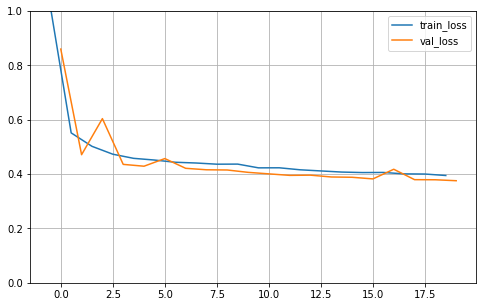

In [34]:
# pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.figure(figsize=(8,5))
epochs = np.arange(0, len(hist["loss"]))
plt.plot(epochs - 0.5, hist["loss"], label="train_loss")
plt.plot(epochs, hist["val_loss"], label="val_loss")
plt.legend()
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()